# 1. Regression

## 1.1. Load Data and Train Model

In [1]:
from sklearn.linear_model import LinearRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LinearRegression()
model.fit(train['X'], train['y'])

mean_squared_error(test['y'], model.predict(test['X']))

np.float64(0.013731416251044857)

In [2]:
from holisticai.utils import RegressionProxy
from holisticai.explainability.metrics import surrogate_metrics
from holisticai.utils.models.surrogate import SurrogateModel
from sklearn.metrics import mean_absolute_percentage_error

proxy = RegressionProxy(predict=model.predict)

In [10]:
surrogate = SurrogateModel(proxy, train['X'], model_type='shallow_tree')
metrics = surrogate_metrics.regression_explainability_metrics(proxy, surrogate, train['X'], train['y'], metric_type="performance")
metrics

,Value,Reference
MSE Difference,-0.006295,0.0
Surrogate MSE,0.007099,0.0


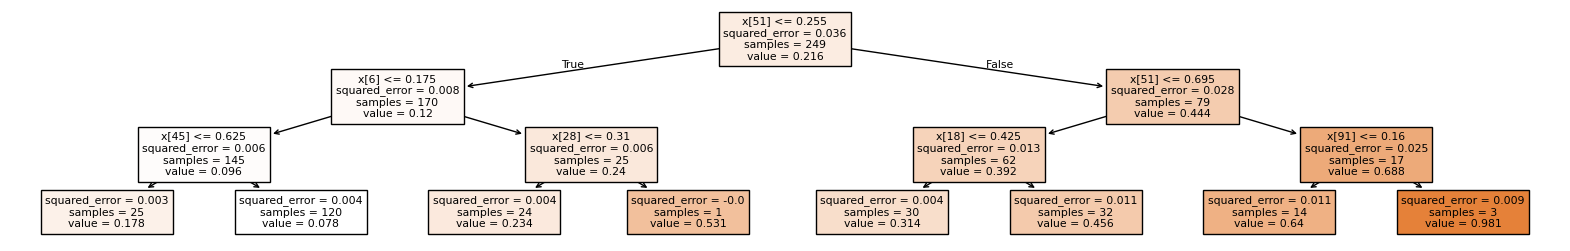

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.title("My Model")
_ = plot_tree(surrogate._surrogate, filled=True)

In [37]:
surrogate = SurrogateModel(proxy, train['X'], model_type='tree')
metrics = surrogate_metrics.regression_explainability_metrics(proxy, surrogate, train['X'], train['y'], metric_type="all")
metrics

,Value,Reference
MSE Difference,-0.004623,0.0
Surrogate MSE,0.003363,0.0
Features Stability,0.829769,1.0
Feature Importances Stability,0.857509,1.0
Spread Divergence,0.176696,0.0
Number of Features,90.000000,1.0
Number of Rules,258.000000,1.0
Tree Depth Variance,6.886380,0.0
Weighted Average Explainability Score,9.523256,0.0
Weighted Average Depth,9.965116,0.0


# 3. Classification

In [16]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression(solver="liblinear")
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.7959093421779989

In [17]:
from holisticai.utils import BinaryClassificationProxy
proxy = BinaryClassificationProxy(predict=model.predict)

In [18]:
surrogate = SurrogateModel(proxy, train['X'], model_type='shallow_tree')
metrics = surrogate_metrics.classification_explainability_metrics(proxy, surrogate, train['X'], train['y'], metric_type="performance")
metrics

,Value,Reference
Accuracy Difference,-0.000221,0.0
Surrogate Accuracy,0.982753,1.0


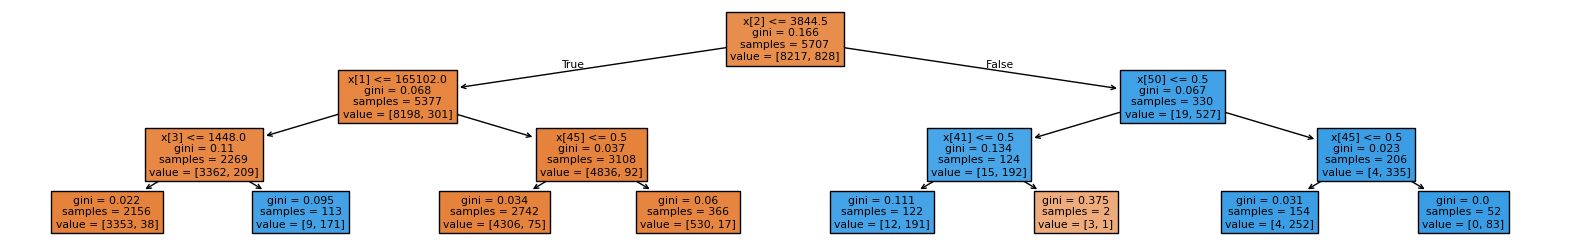

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
_ = plot_tree(surrogate._surrogate, filled=True)

In [23]:
surrogate = SurrogateModel(proxy, train['X'], model_type='tree')
metrics = surrogate_metrics.classification_explainability_metrics(proxy, surrogate, train['X'], train['y'], metric_type="all")
metrics

,Value,Reference
Accuracy Difference,0.000995,0.0
Surrogate Accuracy,0.994362,1.0
Features Stability,0.661559,1.0
Feature Importances Stability,0.996117,1.0
Spread Divergence,0.115706,0.0
Number of Features,50.000000,1.0
Number of Rules,201.000000,1.0
Tree Depth Variance,37.388035,0.0
Weighted Average Explainability Score,8.887609,0.0
Weighted Average Depth,10.959162,0.0


# Multi Classification

In [29]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression(solver='liblinear')
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.8227848101265823

In [30]:
from holisticai.utils import MultiClassificationProxy
proxy = MultiClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

In [33]:
surrogate = SurrogateModel(proxy, train['X'], model_type='shallow_tree')
metrics = surrogate_metrics.classification_explainability_metrics(proxy, surrogate, train['X'], train['y'], metric_type="performance")
metrics

,Value,Reference
Accuracy Difference,0.101266,0.0
Surrogate Accuracy,0.886076,1.0


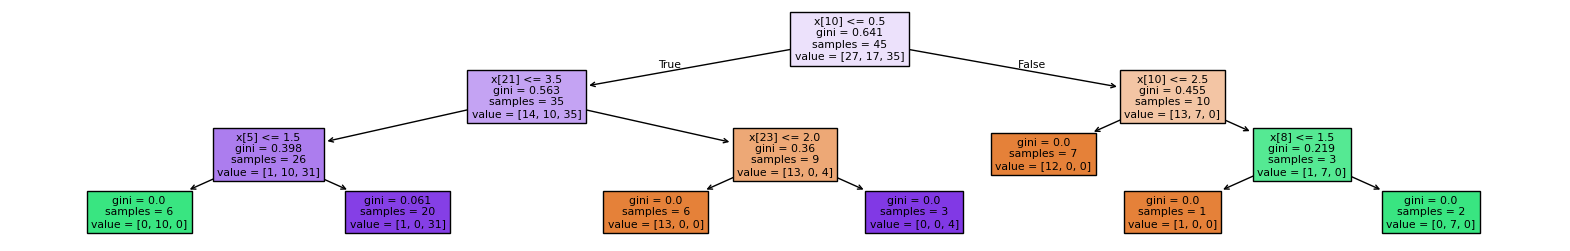

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
_ = plot_tree(surrogate._surrogate, filled=True)

In [32]:
surrogate = SurrogateModel(proxy, train['X'], model_type='tree')
metrics = surrogate_metrics.classification_explainability_metrics(proxy, surrogate, train['X'], train['y'], metric_type="all")
metrics

,Value,Reference
Accuracy Difference,0.025316,0.0
Surrogate Accuracy,0.924051,1.0
Features Stability,0.543108,1.0
Feature Importances Stability,0.772192,1.0
Spread Divergence,0.452500,0.0
Number of Features,17.000000,1.0
Number of Rules,24.000000,1.0
Tree Depth Variance,5.526042,0.0
Weighted Average Explainability Score,5.560000,0.0
Weighted Average Depth,5.560000,0.0
